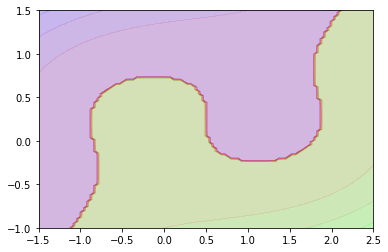

SVR(C=100, degree=2, kernel='poly')

In [36]:
#線形SVM分類器
from sklearn import datasets
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=datasets.load_iris()
X=iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.float64)
scaler=StandardScaler()
svc=LinearSVC(C=1,loss="hinge")
pipeline=Pipeline([
    ("scaler",StandardScaler()),
   ("svm",LinearSVC(C=1,loss="hinge")),
                  ])

pipeline.fit(X,y)
print(pipeline.predict([[5.5,1.7]]))

#多項式特徴量
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf=Pipeline([                    
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svc",LinearSVC(C=10,loss="hinge",random_state=42))
])

X,y=make_moons(n_samples=10,random_state=42)

polynomial_svm_clf.fit(X,y)
polynomial_svm_clf.predict([[0.5,0.5]])

#多項式カーネル
from sklearn.svm import SVC
#poly_kernel_svm_clf=imbPipeline({
#    ("scaler",StandardScaler()),
#    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))
#})

poly_kernel_svm_clf.fit(X,y)
poly_kernel_svm_clf.predict([[0.5,0.5]])


def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.show()

#ガウスrbfカーネル
rbf_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=0.5,C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)
rbf_kernel_svm_clf.predict([[1.5,0.5]])

#線形SVM回帰
from sklearn.svm import LinearSVR ##Rは回帰
svm_reg=LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

#カーネルトリック付きSVM
from sklearn.svm import SVR
svm_poly_reg=SVR(kernel="poly",degree=2,C=100,epsilon=0.1)
svm_poly_reg.fit(X,y)




In [1]:
#線形分割可能データにおけるSVM使用例、
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
#線形SVM
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
iris=datasets.load_iris()
X=iris["data"][:,(2,3)]
y=iris["target"]

poly_svm_clf=Pipeline([
    ("poly_feature",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("linear",LinearSVC(C=5,loss="hinge"))
])

poly_svm_clf.fit(X,y)
y_pred=poly_svm_clf.predict(X)
print(np.mean(y_pred==y))
#カーネルトリック付きSVM
from sklearn.svm import SVC
poly_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svc",SVC(kernel="linear",C=5))
])
poly_kernel_svm_clf.fit(X,y)
poly_kernel_svm_clf.predict(X)
y_pred=poly_kernel_svm_clf.predict(X)
print(np.mean(y_pred==y))

#確率的勾配降下法
from sklearn.linear_model import SGDClassifier
sgd_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("sgd",SGDClassifier(loss="hinge",max_iter=100000,eta0=0.001,learning_rate="constant",tol=-np.infty,
                         random_state=0,alpha=1/(5*150)))
])
     
sgd_clf.fit(X,y)
sgd_clf.predict(X)
y_pred=sgd_clf.predict(X)
print(np.mean(y_pred==y))

C=5
alpha=1/(C*len(X))

lin_clf=LinearSVC(loss="hinge",C=C,random_state=42)
svm_clf=SVC(kernel="linear",C=C)
sgd_clf=SGDClassifier(loss=("hinge"),eta0=0.0001,alpha=alpha,
                     learning_rate="constant",max_iter=100000,tol=-np.infty,random_state=42)

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

lin_clf.fit(X_scaled,y)
svm_clf.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)

#線形SVM、カーネルトリック付きSVM、確率的勾配勾配降下法の比較
print("LinearSVC:                  ",lin_clf.intercept_,lin_clf.coef_)
print("SVC:                     ",svm_clf.intercept_,svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):            ".format(sgd_clf.alpha),sgd_clf.intercept_,sgd_clf.coef_)






C:\Users\a.sakata\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.96
0.96
0.94


C:\Users\a.sakata\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC:                   [-1.7514107  -0.99790184 -3.18018548] [[-1.29828898 -1.46894867]
 [ 0.02090532 -0.01880087]
 [ 2.19699427  3.16756184]]
SVC:                      [-1.80438229 -0.31466756  3.71602789] [[-1.49242209 -1.23441536]
 [-0.68487142 -0.60163267]
 [-2.84187135 -3.29080461]]
SGDClassifier(alpha=0.00133):             [-1.8058 -0.9972 -3.6052] [[-1.49733278 -1.22858843]
 [ 0.0244043  -0.02204132]
 [ 2.74355876  3.26322486]]


In [2]:
#mnistでの分類
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784",version=1,cache=True)
     
X=mnist["data"]
y=mnist["target"]

X_train=X[:60000]
y_train=y[:60000]
X_test=X[60000:]
y_test=y[60000:]

import numpy as np
np.random.seed(42)
rnd_idx=np.random.permutation(60000)
X_train=X_train[rnd_idx]
y_train=y_train[rnd_idx]

from sklearn.svm import LinearSVC
lin_clf=LinearSVC(random_state=42)
lin_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score

y_pred=lin_clf.predict(X_train)
accuracy_score(y_train,y_pred)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled=scaler.transform(X_test.astype(np.float32))

lin_clf=LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled,y_train)

y_pred=lin_clf.predict(X_train_scaled)
accuracy_score(y_train,y_pred)

svm_clf=SVC(gamma="auto")
svm_clf.fit(X_train_scaled[:10000],y_train[:10000])

y_pred=svm_clf.predict(X_train_scaled)
accuracy_score(y_train,y_pred)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_dict={"gamma": reciprocal(0.001,0.1),"C":uniform(1,10)}
rnd_search_cv=RandomizedSearchCV(svm_clf,param_dict,n_iter=10,cv=3,verbose=2)
rnd_search_cv.fit(X_train_scaled[:1000],y_train[:1000])

rnd_search_cv.best_estimator_
rnd_search_cv.best_score_

rnd_search_cv.best_estimator_.fit(X_train_scaled,y_train)

y_pred=rnd_search_cv.best_estimator_.predict(X_train_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_train)

y_pred=rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_pred,y_test)


C:\Users\a.sakata\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\a.sakata\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=8.852316058423087, gamma=0.001766074650481071 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=8.852316058423087, gamma=0.001766074650481071, total=   1.7s
[CV] C=8.852316058423087, gamma=0.001766074650481071 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .. C=8.852316058423087, gamma=0.001766074650481071, total=   1.7s
[CV] C=8.852316058423087, gamma=0.001766074650481071 .................
[CV] .. C=8.852316058423087, gamma=0.001766074650481071, total=   1.8s
[CV] C=1.8271960104746645, gamma=0.006364737055453384 ................
[CV] . C=1.8271960104746645, gamma=0.006364737055453384, total=   1.9s
[CV] C=1.8271960104746645, gamma=0.006364737055453384 ................
[CV] . C=1.8271960104746645, gamma=0.006364737055453384, total=   1.8s
[CV] C=1.8271960104746645, gamma=0.006364737055453384 ................
[CV] . C=1.8271960104746645, gamma=0.006364737055453384, total=   1.5s
[CV] C=9.875199193765326, gamma=0.051349833451870636 .................
[CV] .. C=9.875199193765326, gamma=0.051349833451870636, total=   1.5s
[CV] C=9.875199193765326, gamma=0.051349833451870636 .................
[CV] .. C=9.875199193765326, gamma=0.051349833451870636, total=   1.6s
[CV] C=9.875199193765326, gamma=0.051349833451870636 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.1min finished


0.9709